$$
\Huge {\text {Gradient Descent Part 2}} 
$$
$$
Binh ~ Tran
$$

# Speed of conver by algorithms

![alt text](./contours_evaluation_optimizers.gif "Logo Title Text 1")
Source: An overview of gradient descent optimization algorithms)

# Recall

* **Gradient Descent algoritm:**
    * Predict start point: $\theta = \theta_0$ Initial point 
    * Update $\theta$
        $$\large \theta = \theta - \eta \nabla_{\theta}J(\theta)$$
        with $\nabla_{\theta}J(\theta)$ is gradient of lost function $J(\theta)$ at $\theta$
* **Root of GD problem despend on **
 * Predict start point
 * Learning rate


# Goals of this topic

> $\large{1.}$ **Overcome the limitations of Gradient Descent **   
> $\large{2.}$ **Variables of Gradient Descent **

# Gradient Descent Algorithms

## Momentum
### Physical Aspect of Gradient Descent:



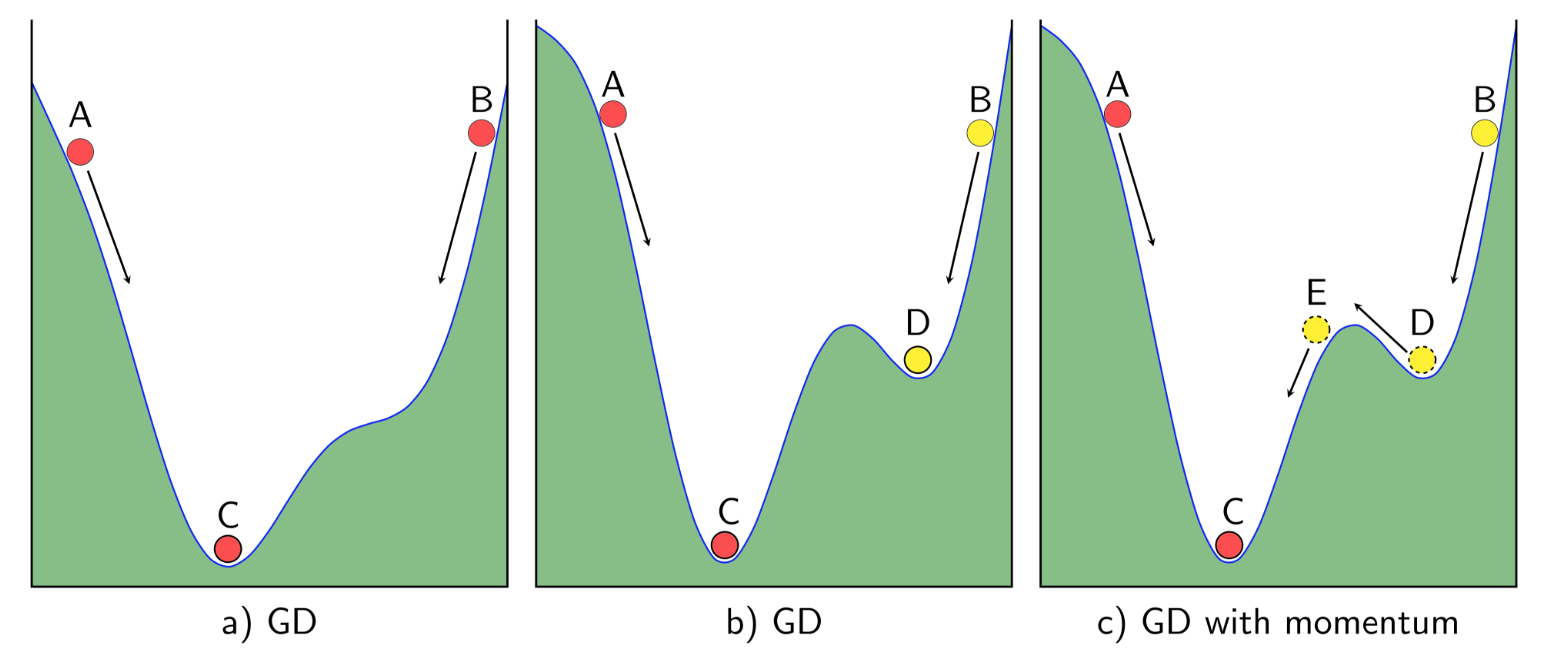

### Implement

** $\Huge * $ Recall **

$$\large \theta = \theta - \eta \nabla_{\theta}J(\theta)$$


$\Huge * $ ** In momentum**
\begin{eqnarray}
\Large v_{t} && = \Large \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta)  \\
\Large \theta && = \Large \theta - v_t
\end{eqnarray}


### select beta

* The momentum ($\gamma$) must be higher to smooth out the update because we give more weight to the past gradients.
* It is recommended to use the default value for $\gamma = 0.9$ but if required, it can be tuned between $0.8$ to $0.999$.
* Momentum takes past gradients into account to smooth out the steps of gradient descent. 
* It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.


In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import time
import IPython.display as display

%matplotlib inline

In [2]:
def f(x):
    return x**2 + 10*np.sin(x)

def f_grad(x):
    return 2*x + 10*np.cos(x)


In [3]:
def GD(eta, x0, N=100):
    x = [x0]
    eps = 1e-3
    for i in range(N):
        x_new = x[-1] - eta * f_grad(x[-1])
        if abs(f_grad(x_new)) < eps:
            break
        x.append(x_new)
    return (x, i)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


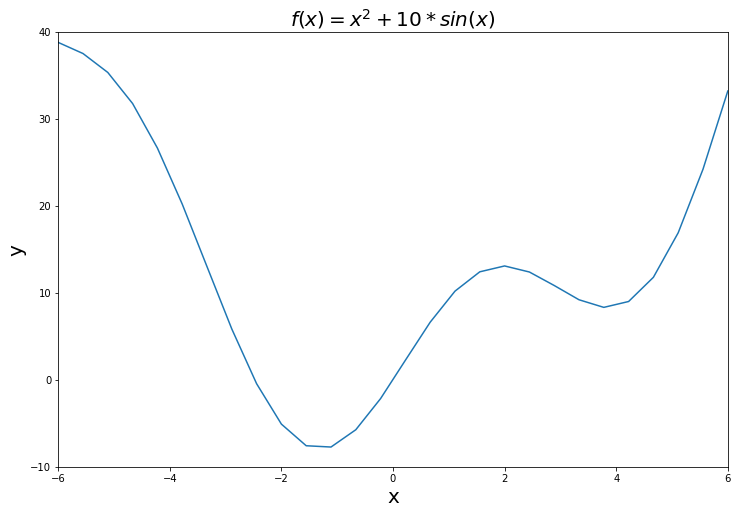

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
x = np.linspace(x_left, x_right, 7*4)

ax.plot(x, f(x))
ax.axis([x_left, x_right, y_bottom, y_top])
plt.xlabel('x', fontname="Arial", fontsize=20)
plt.ylabel('y', fontname="Arial", fontsize=20)
plt.title(r'$f(x) = x^2 + 10*sin(x)$', fontsize=20)


In [5]:
def GD_momentum(eta, gamma, x0, N = 100):
    x = [x0]
    eps = 1e-3
    v_old = np.zeros_like(x0)
    for i in range(N):
        v_new = gamma * v_old + eta * f_grad(x[-1])
        x_new = x[-1] - v_new
        if abs(f_grad(x_new)) < eps:
            break
        x.append(x_new)
        v_old = v_new
    return (x, i) 

In [6]:
(x1, it1) = GD(.1, 5)
print ("x= %f" %x1[-1])
print ("y= %f" %f(x1[-1]))

x= 3.836788
y= 8.315588


In [7]:
(x1, it1) = GD_momentum(.1, .9, 5)
print ("x= %f" %x1[-1])
print ("y= %f" %f(x1[-1]))

x= -1.310205
y= -7.945741


In [8]:
def GD_momentum_Grap(eta, gamma, x0):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    #plt.ion()
    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x_space = np.linspace(x_left, x_right, 7*4)

    N = 100
    x = [x0]
    eps = 1e-3
    v_old = np.zeros_like(x0)
    for i in range(N):
        #ax.clear()
        
        ax.plot(x_space, f(x_space))
        ax.axis([x_left, x_right, y_bottom, y_top])
        plt.xlabel('x', fontname="Arial", fontsize=20)
        plt.ylabel('y', fontname="Arial", fontsize=20)
        plt.title(r'$f(x) = x^2 + 10*sin(x)$ eta: %f ' %(eta), fontsize=20)
        
        v_new = gamma * v_old + eta * f_grad(x[-1])
        x_new = x[-1] - v_new
        
        bbox_props = dict(boxstyle="circle,pad=1.5", fc="cyan", ec="b", lw=2)
        bbox_props1 = dict(boxstyle="circle,pad=1.5", fc="yellow", ec="b", lw=2)
        
        ax.text(x[-1], f(x[-1]), str(i -1) , style='italic', bbox=bbox_props)
        ax.text(x_new, f(x_new), str(i) , style='italic', bbox=bbox_props1)
        ax.legend([r"$f(x) = x^2 + 10*sin(x)$"])
        plt.xlabel('iter: %d, x: %f, grad: %f' %(i, x_new, f_grad(x_new)))
        plt.ylabel('y: %f' %(f(x_new)))
        
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.0)
        
        if abs(f_grad(x_new)) < eps:
            break
            
        x.append(x_new)
        v_old = v_new
    return (x, i) 

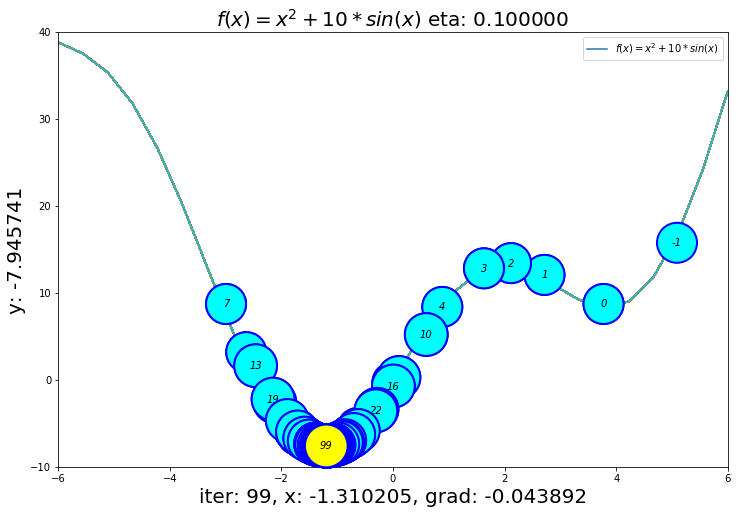

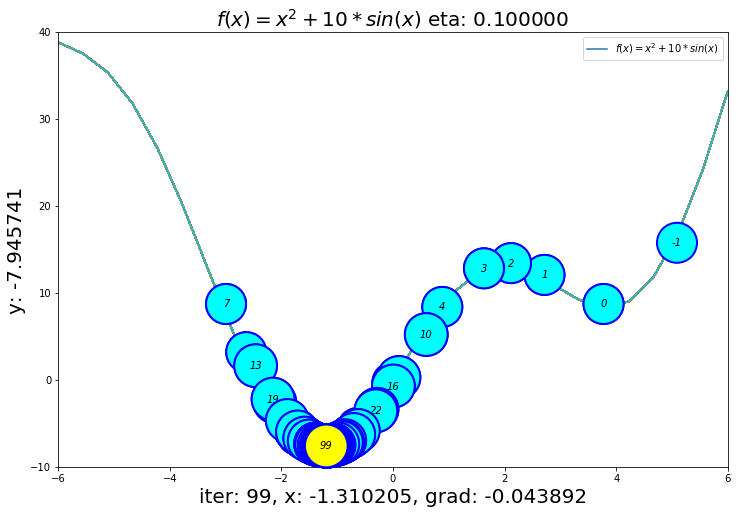

In [9]:
(x1, it1) = GD_momentum_Grap(.1, .9, 5)

## Nesterov accelerated gradient (NAG)

<img src='LR_momentum_contours.gif' /> 

<img src='LR_NAG_contours.gif' />

\begin{eqnarray}
\Large v_{t} &=& \Large \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta - \gamma v_{t-1}) \\
\Large \theta &=& \Large \theta -  v_{t}
\end{eqnarray}

In [51]:
import numpy as np
import pandas as pd
def GD_NAG(x0, eta, gamma):
    
    w = [x0]
    v = [np.zeros_like(x0)]
    N = 100
    eps = 1e-3
    
    for it in range(N):
        v_new = gamma * v[-1] - eta * f_grad( w[-1] + gamma * v[-1] )
        w_new = w[-1] + v_new
        
        if np.linalg.norm(f_grad(w_new)) < eps:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)


In [54]:
def f(x):
    return x**2 + 10*np.sin(x)

def f_grad(x):
    return 2*x + 10*np.cos(x)

import pandas as pd

(w,i) = GD_NAG(5, .1, 0.9)

print("i: ",i)
print("w: ", f_grad(w[-1]))

pd.DataFrame(w)


i:  19
w:  0.001136980295


0
0   5.000000
1   3.716338
2   2.884994
3   2.245678
4   1.435569
5  -0.195481
6  -1.238243
7  -1.171854
8  -1.332459
9  -1.275258
10 -1.319118
11 -1.297489
12 -1.311027
13 -1.303632
14 -1.307992
15 -1.305531
16 -1.306955
17 -1.306143
18 -1.306610
19 -1.306342

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as display

%matplotlib inline 

def GD_NAG_Graph(x0, eta, gamma):
    
    plt.clf();
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111)
    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x_space = np.linspace(x_left, x_right, 7*4)

    w = [x0]
    v = [np.zeros_like(x0)]
    N = 100
    eps = 1e-3

    for i in range(N):
        
        ax.clear()
        
        bbox_props = dict(boxstyle="circle,pad=4", fc="cyan", ec="b", lw=4)
        bbox_props1 = dict(boxstyle="circle,pad=4", fc="yellow", ec="b", lw=4)
        
        ax.plot(x_space, f(x_space), lw=4)
        ax.axis([x_left, x_right, y_bottom, y_top])

        v_new = gamma * v[-1] + eta * f_grad( w[-1] - gamma * v[-1] )
        w_new = w[-1] - v_new

        ax.text(w[-1], f(w[-1]), str(i -1) , style='italic', bbox=bbox_props,  size=8)
        ax.text(w_new, f(w_new), str(i) , style='italic', bbox=bbox_props1, size=8)
        ax.legend([r"$f(x) = x^2 + 10*sin(x)$"], fontsize=18)
        plt.xlabel('iter: %d, x: %f, grad: %f' %(i, w_new, f_grad(w_new)), fontsize=18)
        plt.ylabel('y: %f' %(f(w_new)), fontsize=18)
        
        
        if np.linalg.norm(f_grad(w_new))  < eps:
            break
        w.append(w_new)
        v.append(v_new)
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
        
    return (w, i)

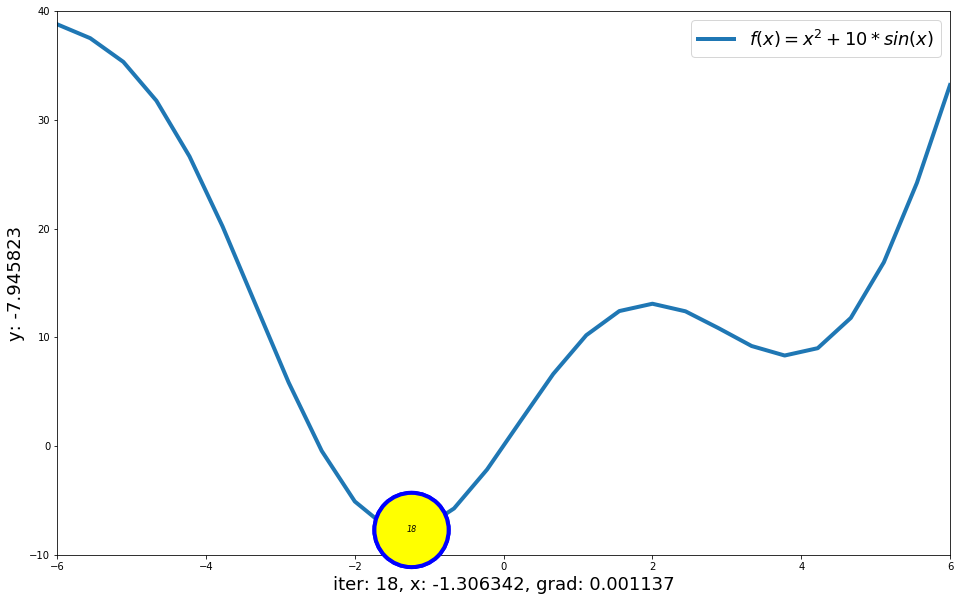

f w: -7.94582332015
i: 19


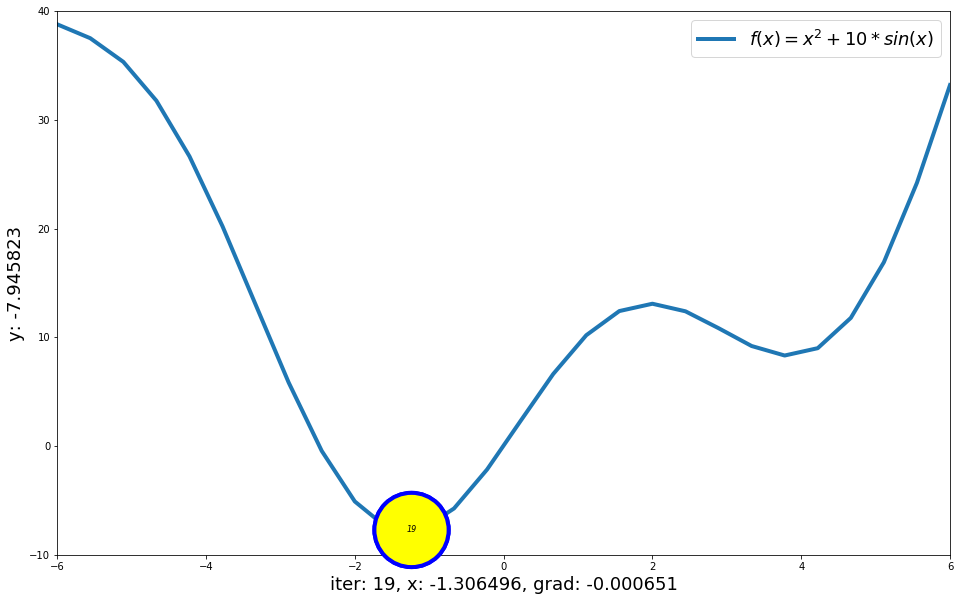

In [30]:
(w, i, ) = GD_NAG_Graph(5, .1, 0.9)
print ("f w:", f(w[-1]))
print ("i:", i)


## Others Algorithms

>  ** Adagrad, Adam, RMSprop,… **

# Variables of Gradient Descent

## Lost function of Linear 

$$\Large J(\mathbf{w}) = \frac{1}{2N}||\mathbf{X}\mathbf{w} - \mathbf{y}||_2^2 = \frac{1}{2N} \sum_{i=1}^N(\mathbf{x}_i \mathbf{w} - y_i)^2 $$

$$\Large \frac{1}{2N} \sum_{i=1}^N(\mathbf{x}_i \mathbf{w} - y_i)^2 $$

## Gradient of lost function

$$\Large \nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = \frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)} ~~~~~(1)$$

## Batch Gradient Descent

* ** Our algorithm previous called Batch Gradient Descent. **
    * Batch is mean all data invole to calculate gradient
* ** Incase of the traning data set too large (for example > billion examples), and incase of online traning (the data update sequencely) calculating gradient at any examples will take alot of time **

## Stochastic Gradient Descent (SGD)

* In this algorithm, we only calculate the derivative of the loss function based on a single data point $x_i$ and update $\theta$ based on this derivative.
* Each time you browse through **all the points** on the whole data is called an ** epoch **
* For GD, ** each epoch ** is equal to ** one update time**. With **SGD** each epoch corresponds to N update times θ with N is the number of data points
> Updating **one point** at a time like this can reduce the speed of an epoch. But look on the other hand, SGD only requires a very small epoch (usually 10 for the first time, then when the new data, just run under an epoch has a good test). Therefore, SGD is suitable for large database problems (mainly Deep Learning, which we will see later in the blog), and mathematical problems that require continuous learning.
* **Lost function**
$$\Large J(\mathbf{w}; \mathbf{x}_i; y_i) = \frac{1}{2}(\mathbf{x}_i \mathbf{w} - y_i)^2$$
* ** Gradient ** 
$$\Large  \nabla_{\mathbf{w}}J(\mathbf{w}; \mathbf{x}_i; y_i) = \mathbf{x}_i^T(\mathbf{x}_i \mathbf{w} - y_i) $$

### Order data point selection

* After each epoch, we need to shuffle the order of the data to ensure randomness. This also affects the performance of SGD
* Update of SGD: 
* $$ \Large \theta = \theta - \eta \nabla_{\theta} J(\theta; \mathbf{x}_i; \mathbf{y}_i)$$

> With $J(\theta;x_i;y_i)$ is the lost function only with one data point (input, label): $(x_i,y_i)$.

### Example with Linear Regression

* ** We demo with the below data $\large y = 3 * X + 4 + .2*Random(1) $**

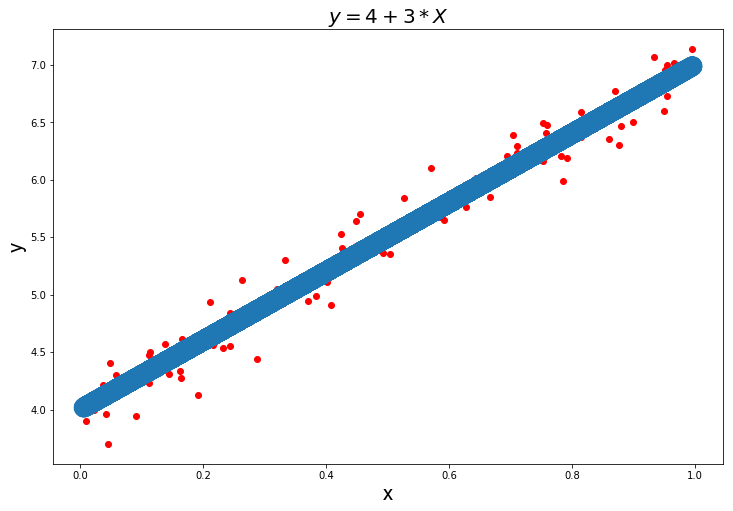

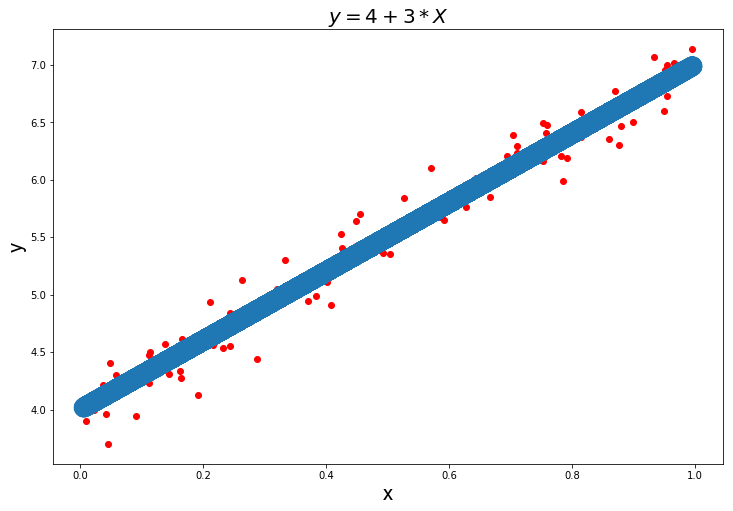

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display

N = 100
X = np.random.rand(N, 1)
y = 4 + 3 * X + .2*np.random.randn(N, 1) # noise added

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

plt.xlabel('x', fontname="Arial", fontsize=20)
plt.ylabel('y', fontname="Arial", fontsize=20)
plt.title(r'$y = 4 + 3 * X $' , fontsize=20)
plt.plot(X, y, 'ro')
plt.plot(X, 4 + 3 * X , linewidth=20.0)
display.display(plt.gcf())
    

In [47]:
# single point gradient
%time
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return  xi.T * a

def SGD(w_init, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    eps = 1e-3
    for it in range(10):
        # shuffle data
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count % iter_check_w == 0:
                w_this_check = w_new
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < eps:
                    return w
                w_last_check = w_this_check
            
    return w
w = [ 0, 0]
eta = 0.1
w_out = SGD(w, eta)
w_out[-1]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


array([ 3.98396304,  3.05394155])

In [48]:
# single point gradient

import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display
import time

N = 100
X = np.random.rand(N, 1)
y = 4 + 3 * X + .2*np.random.randn(N, 1) # noise added

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return  xi.T * a

def SGD_Graph(w_init, eta):
    
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    eps = 1e-3
    norm = 10e5 
    
    for it in range(10):
        # shuffle data
        rd_id = np.random.permutation(N)
        for i in range(N):
            ax.clear()
            count += 1
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count % iter_check_w == 0:
                w_this_check = w_new
                norm = np.linalg.norm(w_this_check - w_last_check)/len(w_init)
                if norm < eps:
                    return w
                w_last_check = w_this_check
                
            
            plt.plot(X, y, 'ro')
            
            x0 = np.array([0, 1])
            y0 = w_new[0] + w_new[1]*x0.T

            plt.plot(x0, y0) 
            plt.xlabel('w0: %f, w1: %f, it: %f, i: %f, norm: %f' % (w_new[0], w_new[1], it, i, norm), fontname="Arial", fontsize=20)
            plt.ylabel('y', fontname="Arial", fontsize=20)
            plt.title(r'$y = 4 + 3 * X $' , fontsize=20)
            bbox_props = dict(boxstyle="circle,pad=4", fc="cyan", ec="b", lw=4)
            ax.axis([0, 1, 2, 8])
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.0)
                
    return w

w = [ 0, 0]
eta = 0.1
w_out = SGD_Graph(w, eta)
w_out[-1]

array([ 4.04698189,  2.95419515])

## Mini-batch Gradient Descent

> * Mini-batch use a number of n greater than 1 but N less than more data. 
> * Mini-Batch Gradient Descent starts each epoch by randomly shuffling the data and divides all data into mini-batches, with each mini-batch having n data points (except the last mini-batch can have less if N is not divisible by n). Each update, this algorithm retrieves a mini-batch to calculate the derivative and updates. The formula can be written as:
___
$$\Large \theta = \theta - \eta\nabla_{\theta} J(\theta; \mathbf{x}_{i:i+n}; \mathbf{y}_{i:i+n})$$
___
> * Mini-batch GD is used in most Machine Learning algorithms, especially in Deep Learning. The value n is usually chosen to be between 50 and 100.

## Stopping Criteria

** When do we know that the algorithm converges and stops? **

In experiment, there are several methods as below:

* **Limit the number of loops: **
___
    This is the most common method and also to ensure that the program runs not too long. However, one drawback of this approach is that the algorithm stops before it is close enough to the solution.
* **Compare the gradient of the solution at two consecutive updates **
___    
       When the value is **small enough to stop.** This method also has a major disadvantage is that the derivative work sometimes become too complicated (for example, when there is too much data), if this method is used, we do not benefit from using the SGD and mini-batch GD.
* ** Compare the value of the loss function of the solution at two consecutive updates **
___    
    When this value is small enough to stop. The disadvantage of this method is that if at one point the function graph is flat in one area but it does not contain the local minimum point (the area is often called saddle points), the algorithm also stops. again before reaching the desired value.
* ** In SGD and mini-batch GD, the usual way is to compare experiences after several updates.** 
___
    In the above Python code for SGD, I apply this comparison every time the experiment is updated 10 times. This also proved to be quite effective.
